

This code processed KNDVI, compute matrix profile for years and months and plot the visualisation with Chord diagram.

: @author: Pius N.Nwachukwu


In [ ]:
!pip install stumpy
!pip install holoviews
!pip install bokeh
!pip install holoviews bokeh
!pip install jupyter_bokeh
!pip install chord
!pip install --upgrade holoviews bokeh
!pip install --upgrade plotly
!pip install holoviews bokeh colorcet
!pip install bokeh_sampledata

In [2]:
import os
import shutil
import ee
import geemap
import pandas as pd
from google.colab import drive


In [3]:
# Authenticate and initialize the Earth Engine module.
ee.Authenticate()
ee.Initialize(project='ee-')

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Calling up the Saved Time Series NDVI Values
csv_file_path = '/content/drive/My Drive/FoRes/ndvi_pixelz_data.csv' # Get the NDVIs in 5000 SR Pixels


# Read the CSV file into a pandas DataFrame
ndvi_df = pd.read_csv(csv_file_path)
print(ndvi_df.head())

        ROI        date  percentage_valid  latitude  longitude  NDVI
0  S_Americ  2000-02-01          29.70645 -6.609515 -58.598977  1355
1  S_Americ  2000-02-01          29.70645 -6.609515 -58.508443  4857
2  S_Americ  2000-02-01          29.70645 -6.654481 -58.694867  3963
3  S_Americ  2000-02-01          29.70645 -6.654481 -58.649596  1773
4  S_Americ  2000-02-01          29.70645 -6.654481 -58.604325  2665


In [5]:
ndvi_df.set_index('date', inplace=True)

In [6]:
# Converting the NDVI to Reflectance
ndvi_df["NDVI_2"] = ndvi_df["NDVI"] / 10000

In [7]:
# # Calculate KNDVI
ndvi_df['KNDVI'] = (ndvi_df['NDVI_2'] + 1) / 2

# print(ndvi_df)

In [8]:
# ndvi_df['ROI']

# Print all the names of the ROIs
print(ndvi_df['ROI'].unique())

['S_Americ' 'N_Americ' 'Afric' 'Europ' 'Asia' 'Aust_Ocean']


In [9]:
# Filter the DataFrame to get rows where the 'Region' column is correspnd to a continent eg 'Africa'
af = ndvi_df[ndvi_df["ROI"] == "Afric"]
asia = ndvi_df[ndvi_df["ROI"] == "Asia"]
eu = ndvi_df[ndvi_df["ROI"] == "Europ"]
na = ndvi_df[ndvi_df["ROI"] == "N_Americ"]
sa = ndvi_df[ndvi_df["ROI"] == "S_Americ"]
oc = ndvi_df[ndvi_df["ROI"] == "Aust_Ocean"]
# print(eu)

In [10]:
# Version_1 for Multiple Pixels [5000 meters] # For the single pixel

# Define the ROI name you want to filter
selected_roi = 'Afric'  # Replace 'Europ' with the name of your ROI

# Filter the DataFrame for pixels within the selected ROI
df_filtered = ndvi_df[ndvi_df['ROI'] == selected_roi]

# Display the first few rows of the filtered DataFrame
print(df_filtered.head())

# Optionally, save the filtered DataFrame to a CSV file
df_filtered.to_csv(f'{selected_roi}_ndvi_pixel_data.csv', index=False)



              ROI  percentage_valid  latitude  longitude  NDVI  NDVI_2  \
date                                                                     
2000-02-01  Afric          0.458109  2.698453  12.986116  5808  0.5808   
2000-02-01  Afric          0.458109  2.698453  13.076148  5827  0.5827   
2000-02-01  Afric          0.458109  2.653487  12.850597  5116  0.5116   
2000-02-01  Afric          0.458109  2.653487  12.940625  5642  0.5642   
2000-02-01  Afric          0.458109  2.653487  12.985639  5496  0.5496   

              KNDVI  
date                 
2000-02-01  0.79040  
2000-02-01  0.79135  
2000-02-01  0.75580  
2000-02-01  0.78210  
2000-02-01  0.77480  


In [11]:
df_filtered_copy = df_filtered.copy()
df_filtered['latitude'] = df_filtered_copy['latitude'].round(2)
df_filtered['longitude'] = df_filtered_copy['longitude'].round(2)
# df_filtered

<ipython-input-11-e15f429b5d80>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['latitude'] = df_filtered_copy['latitude'].round(2)
<ipython-input-11-e15f429b5d80>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['longitude'] = df_filtered_copy['longitude'].round(2)


In [12]:
import pandas as pd

# Load the NDVI dataset
# ndvi_data = pd.read_csv('path_to_your_file.csv')

# Check the structure of the DataFrame to identify relevant columns
print(df_filtered.columns)

# Assuming the columns 'latitude', 'longitude', and 'NDVI' are present
# Group the data by latitude and longitude to count the unique pixels
unique_pixels = df_filtered.groupby(['latitude', 'longitude']).size()

# Print the number of unique pixels
print(f"Number of unique pixels: {len(unique_pixels)}")

# If you want to see a sample of the pixel data
print(unique_pixels.head())


Index(['ROI', 'percentage_valid', 'latitude', 'longitude', 'NDVI', 'NDVI_2',
       'KNDVI'],
      dtype='object')
Number of unique pixels: 5448
latitude  longitude
0.41      12.21        220
0.42      12.21          5
0.43      12.21         65
          12.25         65
0.45      12.21        220
dtype: int64


In [13]:
import pandas as pd

# Load the NDVI dataset (assuming you've already done this)
# Define the range for valid KNDVI values
valid_ndvi_min = -1
valid_ndvi_max = 1

# Filter the dataset for valid NDVI values
valid_ndvi_data = df_filtered[(df_filtered['NDVI_2'] >= valid_ndvi_min) & (df_filtered['NDVI_2'] <= valid_ndvi_max)]

# Group by latitude and longitude to identify unique pixels with valid data
valid_pixels = valid_ndvi_data.groupby(['latitude', 'longitude']).size()

# Calculate the percentage of valid pixels
percentage_valid_pixels = (len(valid_pixels) / 5448) * 100  # Assuming 5460 is the total number of unique pixels

print(f"Percentage of pixels with valid NDVI data: {percentage_valid_pixels:.2f}%")


Percentage of pixels with valid NDVI data: 100.00%


In [14]:
import pandas as pd

# Check the structure of the DataFrame to ensure it's correct
print(df_filtered.head())

# Verify the length of the NDVI time series for a few pixels
print(f"Number of columns (including metadata): {df_filtered.shape[1]}")
print(f"Expected number of NDVI points per pixel: {df_filtered.shape[1] - 3}")

# Let's print out the time series length for the first pixel
first_pixel_series = df_filtered.iloc[0, 3:]
print(f"Length of the first pixel time series: {len(first_pixel_series)}")


              ROI  percentage_valid  latitude  longitude  NDVI  NDVI_2  \
date                                                                     
2000-02-01  Afric          0.458109      2.70      12.99  5808  0.5808   
2000-02-01  Afric          0.458109      2.70      13.08  5827  0.5827   
2000-02-01  Afric          0.458109      2.65      12.85  5116  0.5116   
2000-02-01  Afric          0.458109      2.65      12.94  5642  0.5642   
2000-02-01  Afric          0.458109      2.65      12.99  5496  0.5496   

              KNDVI  
date                 
2000-02-01  0.79040  
2000-02-01  0.79135  
2000-02-01  0.75580  
2000-02-01  0.78210  
2000-02-01  0.77480  
Number of columns (including metadata): 7
Expected number of NDVI points per pixel: 4
Length of the first pixel time series: 4


In [15]:
import pandas as pd

# Assuming ndvi_data is already loaded as a DataFrame

# Pivot the data to create a time series for each pixel
ndvi_pivot = df_filtered.pivot_table(index=['latitude', 'longitude'], columns='date', values='KNDVI')

# Display the reshaped DataFrame
print(ndvi_pivot.head())

# Now, check the length of the time series for one pixel
print(f"Number of time points: {ndvi_pivot.shape[1]}")


date                2000-02-01  2000-03-01  2000-04-01  2000-05-01  \
latitude longitude                                                   
0.41     12.21         0.73505     0.86810     0.91295     0.91175   
0.42     12.21             NaN         NaN         NaN         NaN   
0.43     12.21             NaN         NaN         NaN         NaN   
         12.25             NaN         NaN         NaN         NaN   
0.45     12.21         0.77945     0.85015     0.91195     0.89755   

date                2000-06-01  2000-07-01  2000-08-01  2000-09-01  \
latitude longitude                                                   
0.41     12.21         0.83955     0.56945     0.54505     0.89655   
0.42     12.21             NaN         NaN         NaN         NaN   
0.43     12.21             NaN         NaN         NaN         NaN   
         12.25             NaN         NaN         NaN         NaN   
0.45     12.21         0.83535     0.64835     0.63945     0.78265   

date              

In [16]:
# Fill missing values using interpolation or fill with mean (as needed)
ndvi_pivot_filled = ndvi_pivot.interpolate(method='linear', axis=1).fillna(ndvi_pivot.mean(axis=1))

In [ ]:
# V2B Compute MP and return Motif & 2 or more NN & Discord



import pandas as pd
from collections import defaultdict
import stumpy

# Create a dictionary to store motif occurrences by time, month, and pixel, including nearest neighbors and discords
motif_occurrences_by_month = defaultdict(list)

# Loop through the motif-neighbor pairs and count occurrences by month
for pixel_index, row in ndvi_pivot_filled.iterrows():
    ndvi_series = row.values
    dates = row.index  # Assuming the index of the row contains the dates

    window_size = 24
    mp = stumpy.stump(ndvi_series, m=window_size)

    # Identify the motif by finding the minimum distance in the matrix profile
    motif_idx = mp[:, 0].argmin()
    motif_distance = mp[motif_idx, 0]  # Matrix profile distance for the motif

    # Exclude motifs where the distance is exactly zero
    if motif_distance > 0:
        # Extract the motif sequence and time
        motif_sequence = tuple(ndvi_series[motif_idx:motif_idx + window_size])
        # motif_time = dates[motif_idx]  # Get the time of the motif
        motif_time = pd.to_datetime(dates[motif_idx])  # Ensure motif_time is a datetime object


        # Find the first and second nearest neighbors for the motif
        nearest_neighbors = []
        for i in range(1, 3):  # Collect two nearest neighbors or (for i in range(1, 4): to Collect three nearest neighbors)
            nearest_neighbor_idx = int(mp[motif_idx, i])  # Index of the nearest neighbor
            nearest_neighbor_distance = mp[nearest_neighbor_idx, 0]  # Distance for the nearest neighbor

            # Exclude nearest neighbors with a distance of zero (to avoid trivial matches)
            if nearest_neighbor_distance > 0:
                nearest_neighbor_sequence = tuple(ndvi_series[nearest_neighbor_idx:nearest_neighbor_idx + window_size])
                # nearest_neighbor_time = dates[nearest_neighbor_idx]  # Get the time of the nearest neighbor
                nearest_neighbor_time = pd.to_datetime(dates[nearest_neighbor_idx])  # Ensure nearest_neighbor_time is a datetime object


                # Convert motif_time and nearest_neighbor_time to datetime objects if they are strings
                if isinstance(nearest_neighbor_time, str):
                    nearest_neighbor_time = pd.to_datetime(nearest_neighbor_time)

                # Store nearest neighbor details
                nearest_neighbors.append({
                    'Nearest Neighbor Sequence': nearest_neighbor_sequence,
                    'Nearest Neighbor Time': nearest_neighbor_time
                })

        # Identify discord by finding the maximum distance in the matrix profile
        discord_idx = mp[:, 0].argmax()
        discord_distance = mp[discord_idx, 0]

        if discord_distance > 0:
            # Extract the discord sequence and time
            discord_sequence = tuple(ndvi_series[discord_idx:discord_idx + window_size])
            # discord_time = dates[discord_idx]
            discord_time = pd.to_datetime(dates[discord_idx])  # Ensure discord_time is a datetime object


            # Convert discord_time to a datetime object if it is a string
            if isinstance(discord_time, str):
                discord_time = pd.to_datetime(discord_time)

            # Extract the month and year of the motif
            motif_month = motif_time.month
            motif_year = motif_time.year

            # Record the motif, nearest neighbors, discord, pixel index, month, and year
            motif_occurrences_by_month[(motif_year, motif_month, motif_time)].append({
                'Pixel Index': pixel_index,
                'Motif Sequence': motif_sequence,
                'Nearest Neighbors': nearest_neighbors,
                'Discord Sequence': discord_sequence,
                'Discord Time': discord_time
            })

# Filter motifs that occur in the same month and year across multiple pixels
common_motifs_by_month = {
    (year, month, time): pixels for (year, month, time), pixels in motif_occurrences_by_month.items() if len(pixels) > 1
}

# Convert the common motifs (including nearest neighbors and discords) to a DataFrame for easier manipulation
common_motifs_list = []
for (year, month, time), pixels in common_motifs_by_month.items():
    for data in pixels:
        for nn_index, nn_data in enumerate(data['Nearest Neighbors'], start=1):
            common_motifs_list.append({
                'Year': year,
                'Month': month,
                'Time': time,
                'Pixel Index': data['Pixel Index'],
                'Motif Sequence': data['Motif Sequence'],
                f'Nearest Neighbor {nn_index} Sequence': nn_data['Nearest Neighbor Sequence'],
                f'Nearest Neighbor {nn_index} Time': nn_data['Nearest Neighbor Time'],
                'Discord Sequence': data['Discord Sequence'],
                'Discord Time': data['Discord Time']
            })

common_motifs_df = pd.DataFrame(common_motifs_list)

# Sort the DataFrame by year and month
common_motifs_df = common_motifs_df.sort_values(by=['Year', 'Month', 'Time'])

# Display the results
print("Common motifs, their nearest neighbors, and discords observed at the same time across multiple pixels, sorted by year and month:")
print(common_motifs_df)


# Plot the Chord Diagram

In [ ]:
!pip install bokeh_sampledata

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
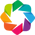

In [22]:
import os
import shutil
import ee
import geemap
import pandas as pd
from google.colab import drive

from bokeh.io import output_file
# if for any reason Chord is not directly available in bokeh,  use holoviews
import holoviews as hv
from bokeh.sampledata.les_mis import data
# from bokeh.charts import output_file, Chord
from bokeh.io import show
from bokeh.sampledata.les_mis import data
from bokeh.plotting import figure, show
from bokeh.layouts import column
from bokeh.io import output_notebook
from holoviews import opts, dim

hv.extension('bokeh')

import calendar
import numpy as np


In [ ]:
# # Calling up the Saved Time Series NDVI Values
# csv_file_path = '/content/drive/My Drive/common_motifs_df_AFr25.csv' # Get the NDVIs in 5000 SR Pixels #common_motifs_df_AFr25 #motif_patterns_EUs



# # Read the CSV file into a pandas DataFrame
# common_motifs_df = pd.read_csv(csv_file_path)
# print(common_motifs_df.head())

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
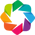

In [21]:


# Enable Holoviews with Bokeh and set up notebook display
hv.extension('bokeh')
output_notebook()

# Load the data `common_motifs_df`
motif_neighbor_link = common_motifs_df[['Year', 'Month', 'Nearest Neighbor 1 Time']].copy()

# Define the participating Columns "Nearest Neighbor 1 Time' column to 'NN1 Time"
motif_neighbor_link = motif_neighbor_link.rename(columns={'Nearest Neighbor 1 Time': 'NN1 Time'})

# Convert `NN1 Time` to datetime and handle invalid values
motif_neighbor_link['NN1 Time'] = pd.to_datetime(motif_neighbor_link['NN1 Time'], errors='coerce')
motif_neighbor_link = motif_neighbor_link.dropna(subset=['NN1 Time'])
motif_neighbor_link['Neighbor Year'] = motif_neighbor_link['NN1 Time'].dt.year
motif_neighbor_link['Neighbor Month'] = motif_neighbor_link['NN1 Time'].dt.month

# Prepare data for the chord diagram
link_data = pd.DataFrame({
    'Source': motif_neighbor_link['Year'].astype(str) + '-' + motif_neighbor_link['Month'].astype(str),
    'Target': motif_neighbor_link['Neighbor Year'].astype(str) + '-' + motif_neighbor_link['Neighbor Month'].astype(str),
    'Value': 1  # Assign a value of 1 to each link for uniform weight
})
link_data = link_data.dropna(subset=['Source', 'Target'])

# Create a nodes DataFrame for months
unique_months = pd.concat([link_data['Source'], link_data['Target']]).unique()

def convert_to_month_name(node):
    parts = node.split('-')
    if len(parts) == 2:  # Format "Year-Month"
        year, month = parts
        try:
            month_name = calendar.month_abbr[int(month)]  # Convert month number to abbreviated name
            return month_name  # Return only the month name
        except ValueError:
            return node
    return node

month_nodes = pd.DataFrame({
    'Node': unique_months,
    'Label': [convert_to_month_name(node) for node in unique_months]
})

# Create a nodes DataFrame for years
unique_years = motif_neighbor_link['Year'].astype(str).unique()
year_nodes = pd.DataFrame({
    'Node': unique_years,
    'Label': unique_years  # Ensure labels exist for years
})

# Add x, y coordinates and rotation angles for year labels
theta = np.linspace(0, 2 * np.pi, len(year_nodes), endpoint=False)  # Evenly spaced angles
year_nodes['x'] = np.cos(theta) * 1.18  # Outer radius for year labels
year_nodes['y'] = np.sin(theta) * 1.18
year_nodes['angle'] = np.degrees(theta) + 270  # Rotate text to curve along the circle

# Combine year and month nodes
combined_nodes = pd.concat([month_nodes, year_nodes], ignore_index=True)

# Convert the combined nodes DataFrame to a HoloViews Dataset
nodes = hv.Dataset(combined_nodes, kdims=['Node'])

# Create the chord diagram without nodes
chord = hv.Chord((link_data, nodes)).opts(
    opts.Chord(
        cmap='Category20', title="Motif and Nearest Neighbor Connections with Curved Year Labels",
        edge_alpha=1, node_size=0,  # Hide nodes by setting node_size to 0
        edge_color='Source', labels='Label',
        label_text_font_size='7pt',
        height=1000, width=1000,
        padding=0.9
    )
)


# Add year labels with rotation for curving
year_labels = hv.Labels(year_nodes, kdims=['x', 'y'], vdims=['Label', 'angle']).opts(
    text_align='center',
    text_color='red',
    text_font_size='10pt',
    angle='angle'  # Rotate labels based on their positions
)

# Overlay year labels on the chord diagram
overlay = chord * year_labels

# Display the chord diagram with curved outer year labels
from bokeh.plotting import show
show(hv.render(overlay))


# This section adjusts the dataframe and filters out some data

In [ ]:
# # Calling up the Saved Time Series NDVI Values
# file_path  = '/content/drive/My Drive/common_motifs_df_AFr25.csv' # Get the NDVIs in 5000 SR Pixels #common_motifs_df_AFr25 #motif_patterns_EUs
# data = pd.read_csv(file_path)

# # Display the first few rows of the dataset to understand its structure
# data.head()

In [ ]:
# Filter data: Identify months with less than 5 events and remove them
# Convert the 'Time' column to datetime if it's not already
data['Time'] = pd.to_datetime(data['Time'])

monthly_event_counts = data.groupby(data['Time'].dt.to_period('M')).size()
months_to_keep = monthly_event_counts[monthly_event_counts >= 29].index

# Filter the dataframe to retain only months with at least 5 events or adjust the number as desired
filtered_data = data[data['Time'].dt.to_period('M').isin(months_to_keep)]

# Confirm the filtering by showing the size of the filtered dataset
filtered_data_info = filtered_data.groupby(filtered_data['Time'].dt.to_period('M')).size()

# Display the filtered data summary to the user

print(filtered_data_info)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
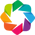

<ipython-input-15-12199c4633a7>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  motif_neighbor_link['Neighbor Year'] = motif_neighbor_link['NN1 Time'].dt.year
<ipython-input-15-12199c4633a7>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  motif_neighbor_link['Neighbor Month'] = motif_neighbor_link['NN1 Time'].dt.month


In [ ]:
# Enable Holoviews with Bokeh and set up notebook display
hv.extension('bokeh')
output_notebook()


#  Load the data `common_motifs_df`
motif_neighbor_link = filtered_data[['Year', 'Month', 'Nearest Neighbor 1 Time']].copy()


# Define the participating Columns "Nearest Neighbor 1 Time' column to 'NN1 Time"
motif_neighbor_link = motif_neighbor_link.rename(columns={'Nearest Neighbor 1 Time': 'NN1 Time'})

# Convert `NN1 Time` to datetime and handle invalid values
motif_neighbor_link['NN1 Time'] = pd.to_datetime(motif_neighbor_link['NN1 Time'], errors='coerce')
motif_neighbor_link = motif_neighbor_link.dropna(subset=['NN1 Time'])
motif_neighbor_link['Neighbor Year'] = motif_neighbor_link['NN1 Time'].dt.year
motif_neighbor_link['Neighbor Month'] = motif_neighbor_link['NN1 Time'].dt.month

# Prepare data for the chord diagram
link_data = pd.DataFrame({
    'Source': motif_neighbor_link['Year'].astype(str) + '-' + motif_neighbor_link['Month'].astype(str),
    'Target': motif_neighbor_link['Neighbor Year'].astype(str) + '-' + motif_neighbor_link['Neighbor Month'].astype(str),
    'Value': 1  # Assign a value of 1 to each link for uniform weight
})
link_data = link_data.dropna(subset=['Source', 'Target'])

# Create a nodes DataFrame for months
unique_months = pd.concat([link_data['Source'], link_data['Target']]).unique()

def convert_to_month_name(node):
    parts = node.split('-')
    if len(parts) == 2:  # Format "Year-Month"
        year, month = parts
        try:
            month_name = calendar.month_abbr[int(month)]  # Convert month number to abbreviated name
            return month_name  # Return only the month name
        except ValueError:
            return node
    return node

month_nodes = pd.DataFrame({
    'Node': unique_months,
    'Label': [convert_to_month_name(node) for node in unique_months]
})

# Create a nodes DataFrame for years
unique_years = motif_neighbor_link['Year'].astype(str).unique()
year_nodes = pd.DataFrame({
    'Node': unique_years,
    'Label': unique_years  # Ensure labels exist for years
})

# Add x, y coordinates and rotation angles for year labels
theta = np.linspace(0, 2 * np.pi, len(year_nodes), endpoint=False)  # Evenly spaced angles
year_nodes['x'] = np.cos(theta) * 1.18  # Outer radius for year labels
year_nodes['y'] = np.sin(theta) * 1.18
year_nodes['angle'] = np.degrees(theta) + 270  # Rotate text to curve along the circle

# Combine year and month nodes
combined_nodes = pd.concat([month_nodes, year_nodes], ignore_index=True)

# Convert the combined nodes DataFrame to a HoloViews Dataset
nodes = hv.Dataset(combined_nodes, kdims=['Node'])

# Create the chord diagram without nodes
chord = hv.Chord((link_data, nodes)).opts(
    opts.Chord(
        cmap='Category20', title="Motif and Nearest Neighbor Connections with Curved Year Labels",
        edge_alpha=1, node_size=0,  # Hide nodes by setting node_size to 0
        edge_color='Source', labels='Label',
        label_text_font_size='7pt',
        height=1000, width=1000,
        padding=0.9
    )
)


# Add year labels with rotation for curving
year_labels = hv.Labels(year_nodes, kdims=['x', 'y'], vdims=['Label', 'angle']).opts(
    text_align='center',
    text_color='red',
    text_font_size='10pt',
    angle='angle'  # Rotate labels based on their positions
)

# Overlay year labels on the chord diagram
overlay = chord * year_labels

# Display the chord diagram with curved outer year labels
from bokeh.plotting import show
show(hv.render(overlay))
